#Model Interpretability
Interpreting the modelon 'Sampling' notebook


In [ ]:
#https://drive.google.com/file/d/1CppeqGbiBzX61jx56gcXyGGDNEeLlJ-W/view?usp=share_link
!gdown 1CppeqGbiBzX61jx56gcXyGGDNEeLlJ-W

Downloading...
From: https://drive.google.com/uc?id=1CppeqGbiBzX61jx56gcXyGGDNEeLlJ-W
To: /content/train_loan_imbalanced.csv
100% 38.0k/38.0k [00:00<00:00, 42.7MB/s]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd
df = pd.read_csv('/content/train_loan_imbalanced.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info() #It will give me missing values if available

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df = df.drop('Loan_ID',  axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#drop missing values
df.dropna(inplace = True, axis =0)

In [ ]:
df['Loan_Status'] = np.where(df['Loan_Status']=='Y',1,0)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [ ]:
df['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 48.8+ KB


#Label Encoder

In [ ]:
df = pd.get_dummies(df, columns = ['Dependents','Gender', 'Married', 'Education'	,'Self_Employed', 'Property_Area'])
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,...,1,0,1,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,...,1,0,1,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,...,1,0,1,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,...,1,1,0,1,0,1,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,...,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,1,0,0,0,...,0,1,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,0,0,0,1,...,1,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,0,1,0,0,...,1,0,1,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,0,0,1,0,...,1,0,1,1,0,1,0,0,0,1


In [ ]:
# this is a nice non-null values dataset. Let's check the number of rows and number of columns for the dataset
df.shape

(480, 21)

#Data Splitting

In [ ]:
# importing library for splitting

from sklearn.model_selection import train_test_split

Subsetting my dataset into X features and Y target variable for modeling. Converting X and Y to numpy arrays. Then using train_test_split for data splitting (80/20)

In [ ]:
# the target variable is Y and we know that this is 'Loan_Status'
Y = df['Loan_Status']
print(Y.shape) # a single column with 480 rows

(480,)


In [ ]:
# everything else is X so we will just drop the column 'Loan_Status'
X = df.drop('Loan_Status', axis=1)
print(X.shape) # note that we got 20 columns and 480 rows.

(480, 20)


In [ ]:
#adding this code just to print my top 5 features graph in the partial dependence question
X = df[['Credit_History', 'CoapplicantIncome', 'LoanAmount', 'ApplicantIncome' ,'Property_Area_Rural', 'Property_Area_Urban', 'Property_Area_Semiurban']]
X

,Credit_History,CoapplicantIncome,LoanAmount,ApplicantIncome,Property_Area_Rural,Property_Area_Urban,Property_Area_Semiurban
1,1.0,1508.0,128.0,4583,1,0,0
2,1.0,0.0,66.0,3000,0,1,0
3,1.0,2358.0,120.0,2583,0,1,0
4,1.0,0.0,141.0,6000,0,1,0
5,1.0,4196.0,267.0,5417,0,1,0
...,...,...,...,...,...,...,...
609,1.0,0.0,71.0,2900,1,0,0
610,1.0,0.0,40.0,4106,1,0,0
611,1.0,240.0,253.0,8072,0,1,0
612,1.0,0.0,187.0,7583,0,1,0


In [ ]:
# now, splitting the data with the 80/20 split

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

In [ ]:
# checking my work 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(384, 20) (96, 20) (384,) (96,)


#Fitting the Model

Fitting the model using Random Forest classification model and making new variables to save my train and test predictions.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train,y_train)
train_preds = clf.predict(X_train) # store the predictions
test_preds = clf.predict(X_test) # store the predictions


## Evaluating the Model

Creating the classification report


In [ ]:
# importing classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Creating confusion matrix
confusion_matrix(y_true=y_train, y_pred= train_preds) #train confusion matrix


array([[120,   0],
       [  0, 264]])

In [ ]:
confusion_matrix(y_true=y_test, y_pred= test_preds) #test confusion matrix

array([[14, 14],
       [ 3, 65]])

In [ ]:
print(classification_report(y_true=y_test, y_pred= test_preds)) #test report

              precision    recall  f1-score   support

           0       0.82      0.50      0.62        28
           1       0.82      0.96      0.88        68

    accuracy                           0.82        96
   macro avg       0.82      0.73      0.75        96
weighted avg       0.82      0.82      0.81        96



#Permutation importance
Printing the Top 5 features with 20 repeats in a box plot.

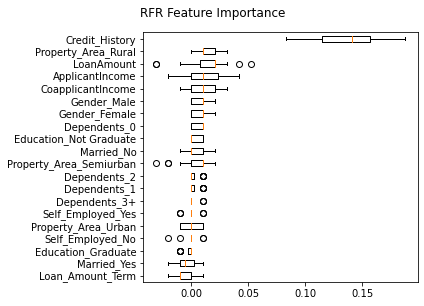

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X_test, y_test, n_repeats=20,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
fig.suptitle('RFR Feature Importance', y=1.05)
fig.tight_layout()
plt.show()

According to boxplot, my top features are - 
Credit History, Property_Area, Loan Amount, Applicant Income and Coapplicant Income

#Creating the partial dependence plots for the top 5 features.

When I found out my top 5 features then I have created a new X variable which consists of only these 5 features and then splitted my data on the basis of new X variable

In [ ]:
!pip install pulp # for partial dependence plots!
!pip install pycebox
from pycebox.ice import ice, ice_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_X_df = pd.DataFrame(X_train, columns=X.columns)
train_X_df.head()

,Credit_History,CoapplicantIncome,LoanAmount,ApplicantIncome,Property_Area_Rural,Property_Area_Urban,Property_Area_Semiurban
172,1.0,0.0,81.0,3522,1,0,0
288,1.0,0.0,115.0,4124,0,0,1
607,1.0,1411.0,157.0,3987,1,0,0
55,1.0,1167.0,97.0,2708,0,0,1
461,1.0,0.0,128.0,7740,0,1,0


In [ ]:
def plot_ice_grid(dict_of_ice_dfs, data_df, features, ax_ylabel='', nrows=4, 
                  ncols=4, figsize=(12, 12), sharex=False, sharey=True,
                  num_grid_points = 10, 
                  subplots_kws={}, rug_kws={'color':'k'}, **ice_plot_kws):
    """A function that plots ICE plots for different features in a grid."""
    fig, axes = plt.subplots(nrows=nrows, 
                             ncols=ncols, 
                             figsize=figsize,
                             sharex=sharex,
                             sharey=sharey,
                             **subplots_kws)
    # for each feature plot the ice curves and add a rug at the bottom of the subplot

    for f, ax in zip(features, axes.flatten()):
        ice_plot(dict_of_ice_dfs[f], ax=ax, **ice_plot_kws)
        # add the rug
        sns.distplot(data_df[f], ax=ax, hist=False, kde=False, 
                     rug=True, rug_kws=rug_kws)
        ax.set_title('feature = ' + f)
        ax.set_ylabel(ax_ylabel)
        sns.despine()
        
    # get rid of blank plots
    for i in range(len(features), nrows*ncols):
        axes.flatten()[i].axis('off')

    return fig

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

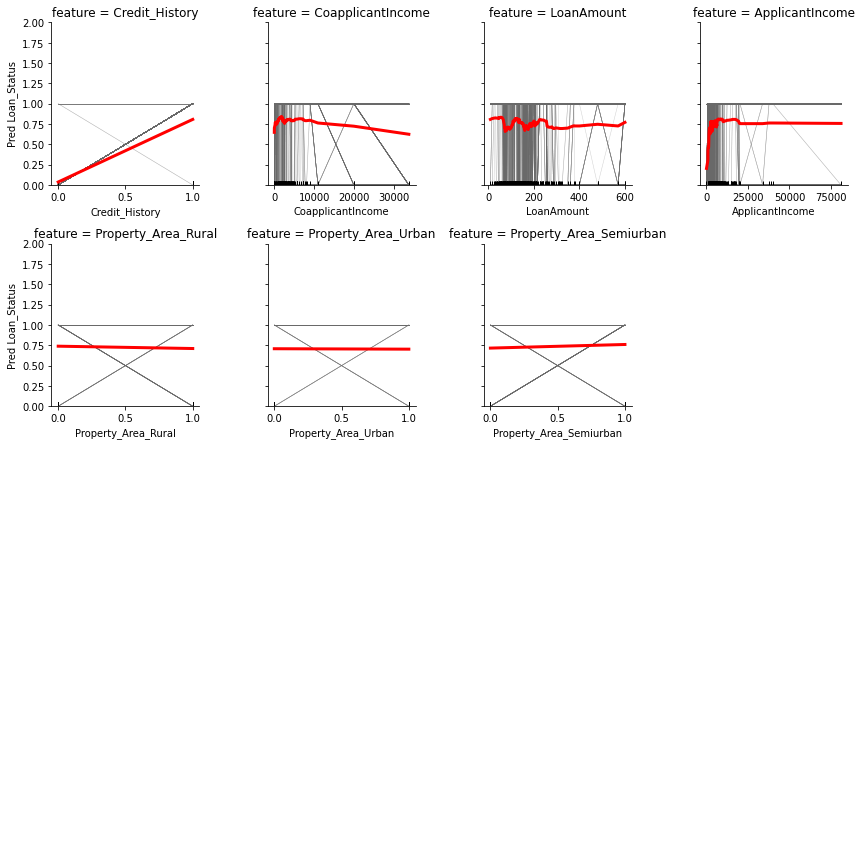

In [ ]:
# columns to plot
features = train_X_df.columns

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=train_X_df, column=feat, predict=clf.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, train_X_df, features,
                    ax_ylabel='Pred Loan_Status', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,2])
#plt.suptitle('ICE plots (training data): RFR model')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

#Meaningful bullets about what I see in the plots are mentioned below.

These graphs tell us how the model is using the features for the prediction.
Grey lines shows us the each row in X train and red line show us the average of all such grey lines.

1. X axis denotes the variables we have taken as an input and Y axis denotes the variable we are predicting which is loan status.
Y axis will tell us whether the applicant should be granted loan or not 

2. From the credit history variable graph, we can see that it is showing us the linear relation between X and Y variable which means more good the credit history is, more likely the applicant will be able to get loan.

3. From the Co applicant Income variable graph we can see that, grey lines are showing us all the different values tried out for each row for Co applicant Income variable. We are showing how the model would predict for the individual row with different values of Co applicant Income

4. From the Property Area variable graph we can see, it is going flat therefore, it won't be as much important as other variables.

5. For Applicant Income, the curve is much smoother as the applicant income is increasing, the chances of getting loan is getting constant. Whereas low applicant income will decrease the chances of getting loan.

6. From the loan amount graph, we can see the curve is slightly curved in the starting, so the loan status will vary according to loan amount 

